# Clothes Classifier

## 1st Class: Knowing the dataset

- In this code we use deep learning to classify what is the category of each clothes according to the image beeing showed to us.

- We're going to use Keras library (Tensorflow)

> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. [gitHub](https://github.com/zalandoresearch/fashion-mnist)

In [73]:
from tensorflow import keras
import pandas as pd

dataset = keras.datasets.fashion_mnist
((images_train, identity_train), (images_test, identity_test)) = dataset.load_data() 
# images = x, identity = y 
len(images_train)
images_train.shape

(60000, 28, 28)

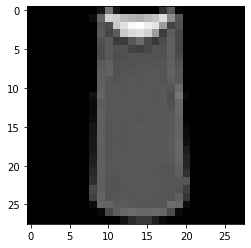

In [57]:
import matplotlib.pyplot as plt
plt.imshow(images_train[2], cmap = 'gray')

## 2nd Class: Starting to assemble the model 

- Here, I'm trying to show some images from the dataset and identify them, what can help us to understand the process and make better decisions during the construction of the code. 

- The model consists of 3 parts: **1. Input, 2. Processing and 3. Output**.
    - This parts are divided sequentially. Therefore, we're going to use ```keras.Sequential()``` here
    - To use the images, I'm going to use ```keras.layers.Flatten()```. This "tool" convert the image (in this case with 28x28 pixels) to a image with only one row without lose data, only putting all pixels in just one row. This is our **Input layer**

In [58]:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

print(identity_train)
category_mnist = {0 : "Tshirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 
                  5: "Sandal",  6: "Shirt",   7: "Sneaker",  8: "Bag",   9: "Ankle boot"}



[9 0 0 ... 3 0 5]


In [59]:
names_train = [category_mnist[number] for number in identity_train]
names_train[0:10]

['Ankle boot',
 'Tshirt',
 'Tshirt',
 'Dress',
 'Tshirt',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

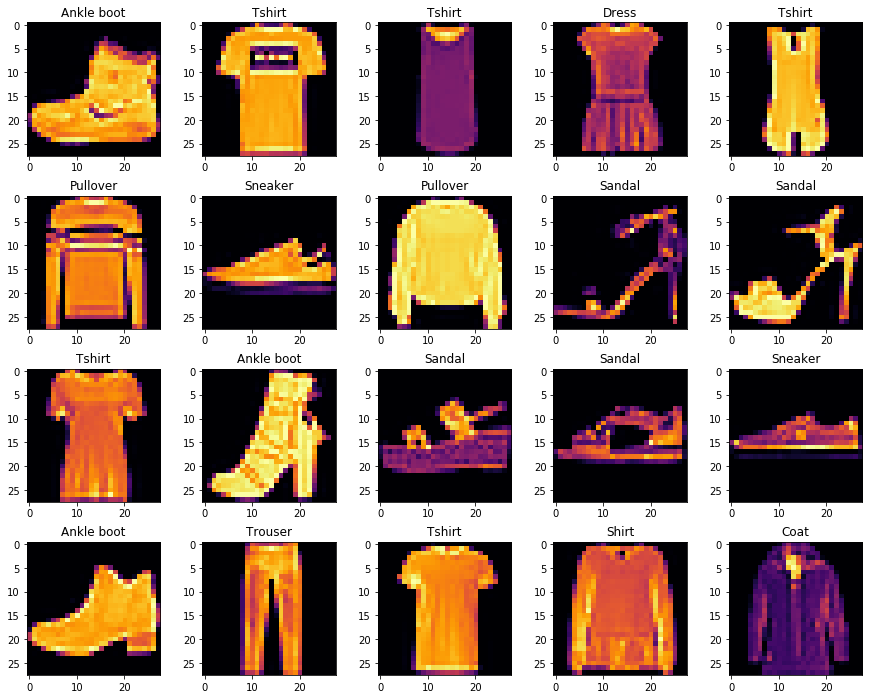

In [60]:
fig, axs = plt.subplots(4, 5, figsize = (15, 12))
image = 0
for row in range(4):
    for column in range(5):
        fig.subplots_adjust(wspace = 0.3, hspace = 0.3)
        axs[row, column].imshow(images_train[image], cmap = "inferno")
        axs[row, column].set_title(names_train[image])
        image = image + 1

## 3rd Class: Adding hidden layers

### Deep Learning model

1. Input layer (Layer 0) --> `keras.layer.Flatten()`
    - Convert the image to a array with the same quantity of pixels

2. Processing layer (Layer 1) --> `keras.layers.Dense()` - using ReLU
    - Make a communication line between the units of the 1st layer with all the units of the 2nd layer

3. Output Layer (Layer 2) --> `keras.layer.Dense()` - using softmax


### ReLU

- Rectified Linear Unit
    - x: input
    - y: output
- Activation function
- Non-linear function (allow us to create a model with more layers / hidden layers)

<img src="https://www.researchgate.net/profile/Brahim_Matougui/publication/335540811/figure/fig5/AS:798392854786050@1567363098679/The-plot-of-the-ReLU-function.ppm" alt="drawing" width="300"/>

In [75]:
from tensorflow import nn

# Normalizing the images to reduce the loss
images_train = images_train / images_train.max()

model = keras.Sequential([keras.layers.Flatten(input_shape = images_train[0].shape), # Input layer
                         keras.layers.Dense(256, activation = tensorflow.nn.relu),    # Processing layer; nn - neural network, 
                         keras.layers.Dense((identity_train.max() + 1), activation = tensorflow.nn.softmax)# output
                         ])

## 4th Class: Training the model

- To train a model of deep learning we need one more step before the famous `.fit()` that we are used to use the `model.compile()`. This method need 2 arguments:
    1. optimizer - method used to improve the solution. We'll use `adam`
    2. loss - Sparse categorical crossentropy.

In [76]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy')

model.fit(images_train, identity_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4842
